Standardizing numeric variables...
Computing correlation matrix...


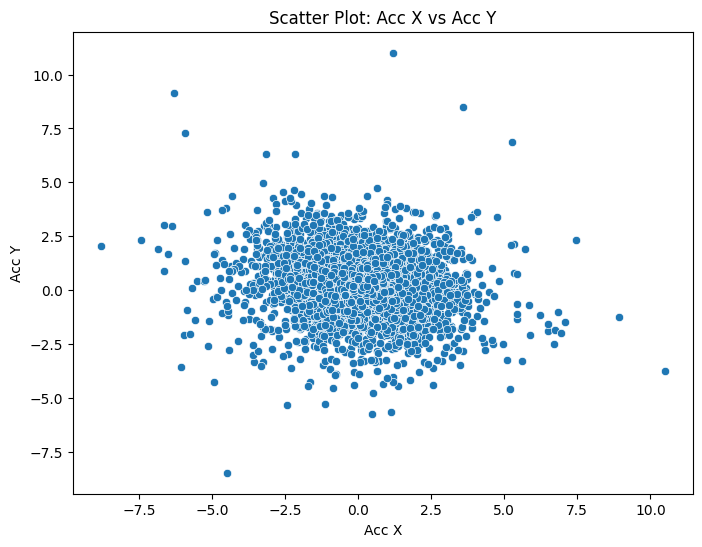

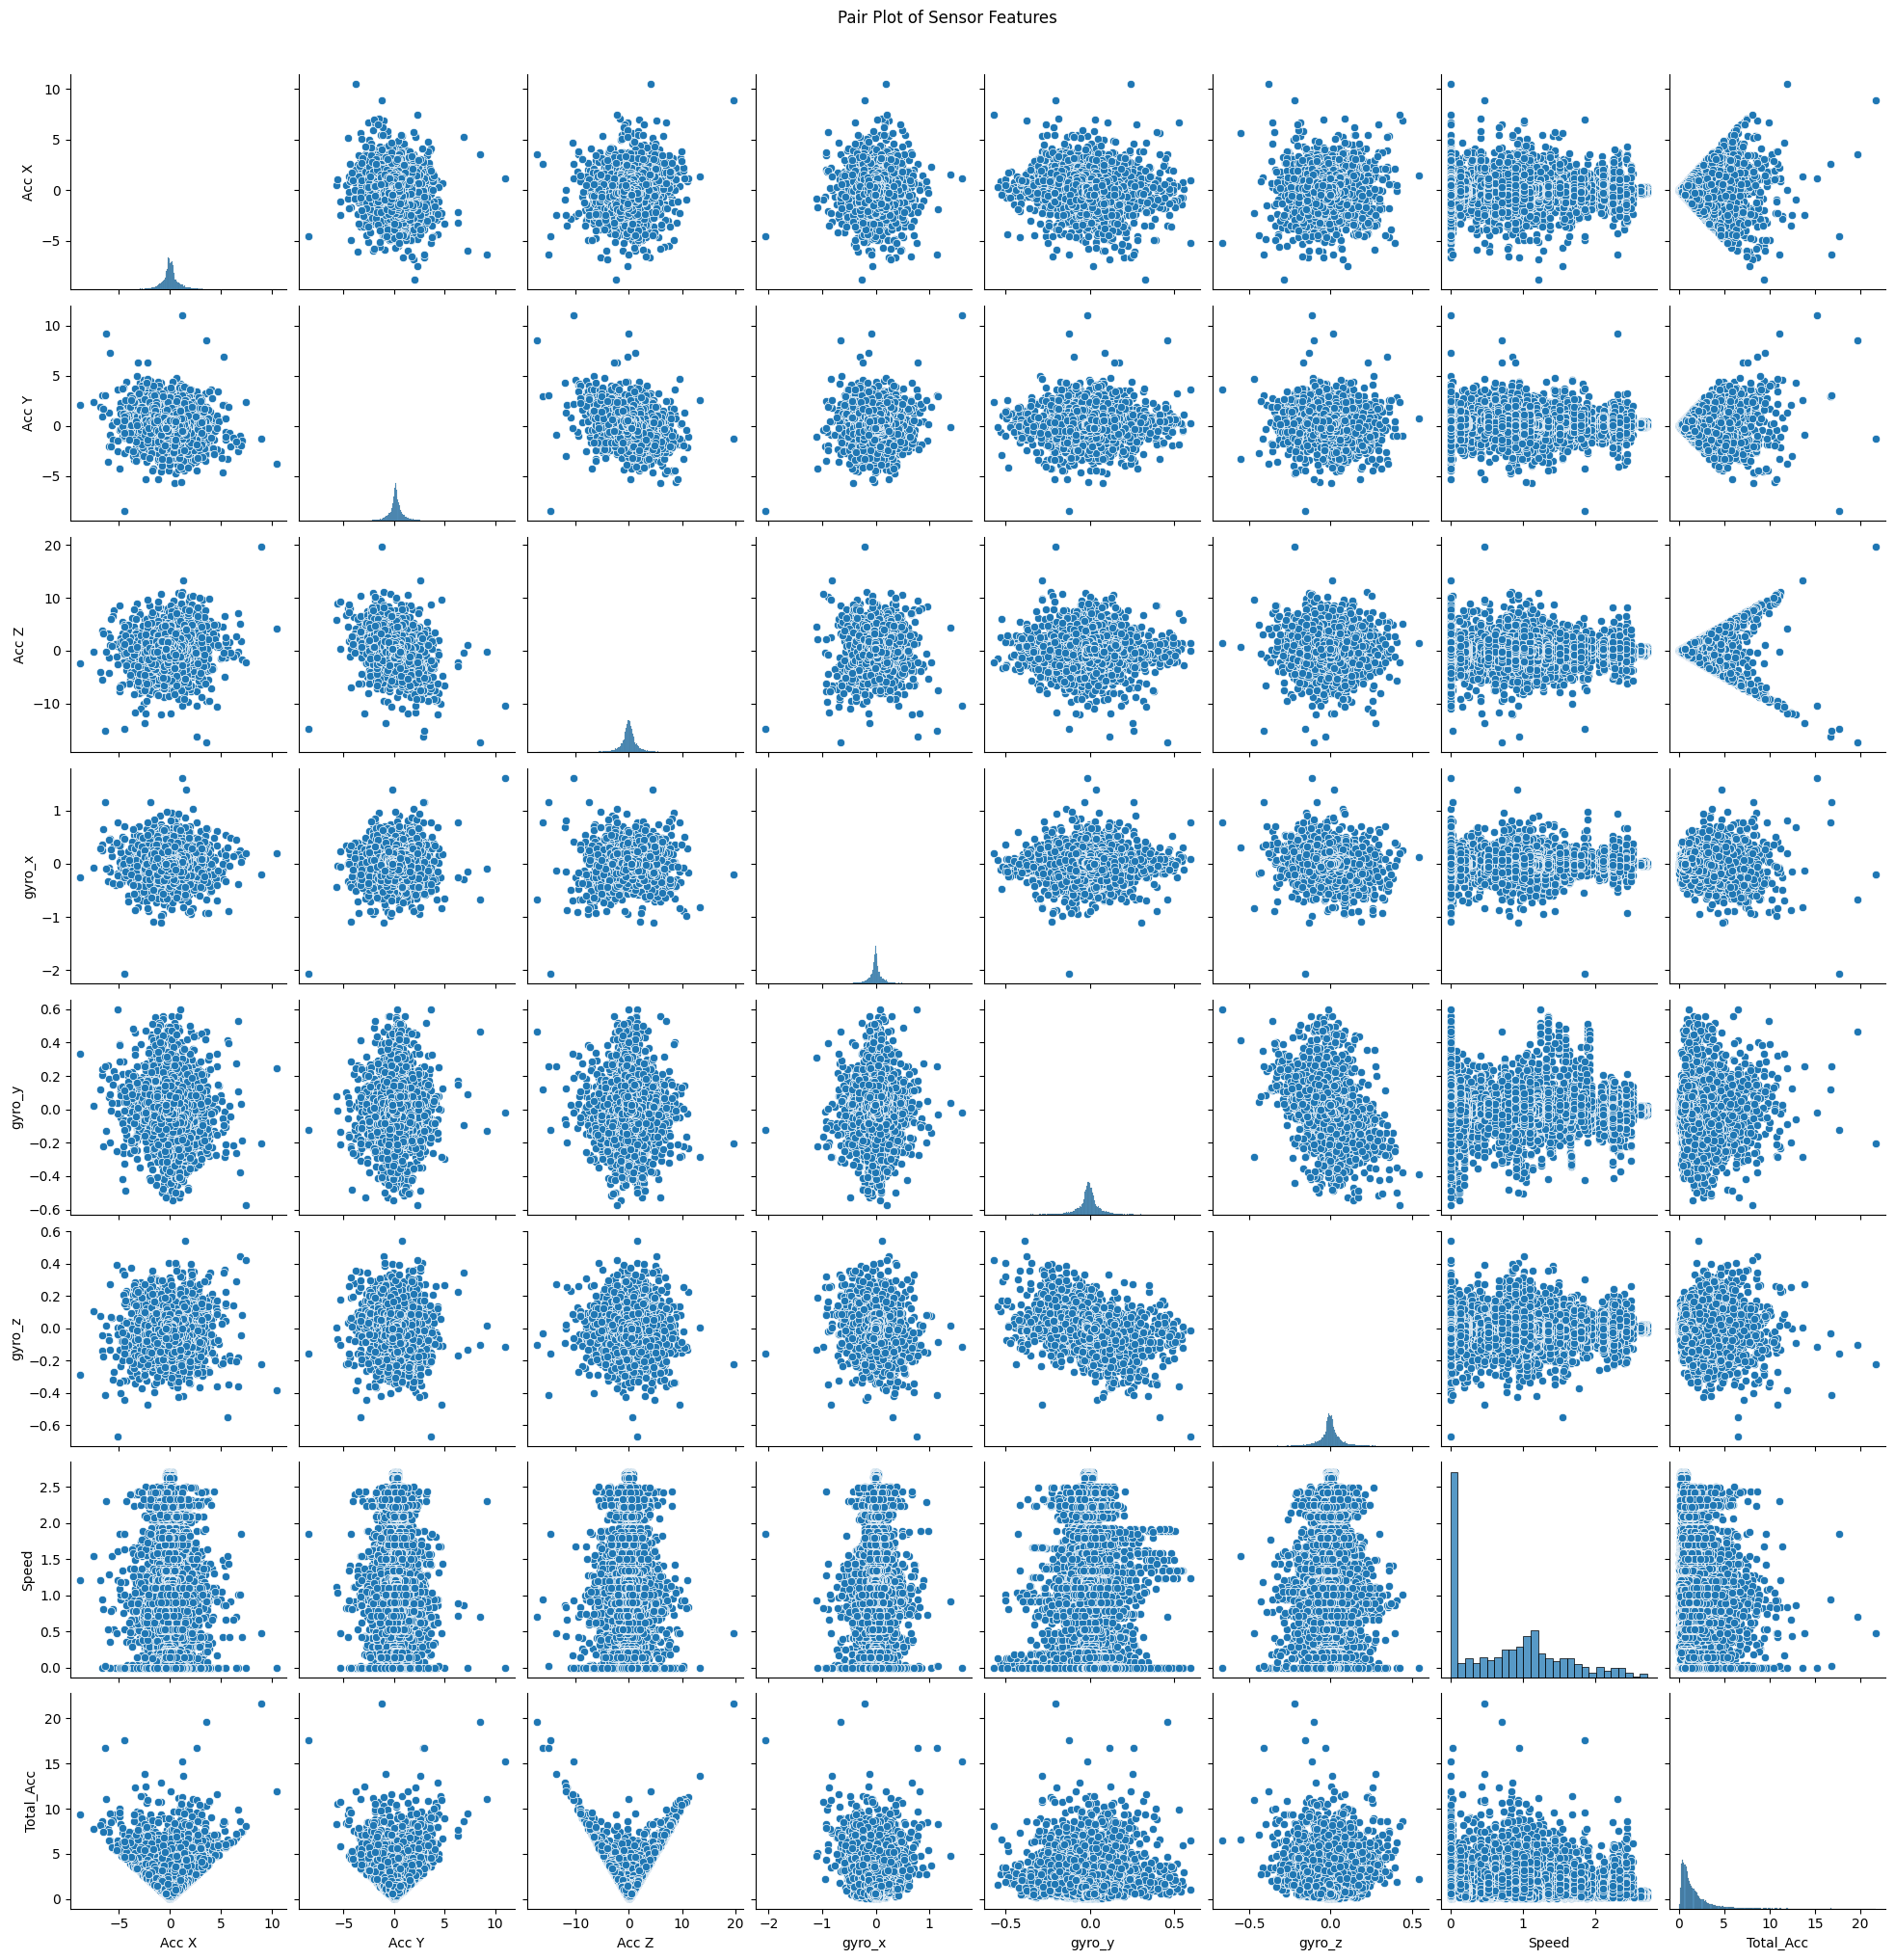

In [ ]:
# DAY 1
# 1d. Conduct Correlation Analysis

# i. Data Preparation - Handle missing values and standardize variables if necessary
print("Standardizing numeric variables...")
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(numeric_df), columns=numeric_df.columns)

# ii. Compute Correlations - Calculate pairwise correlation coefficients between all variables
print("Computing correlation matrix...")
corr_matrix = df_scaled.corr()

# iii. Generate Scatter Plots for key variable pairs

#  Scatter Plot for Acc X vs Acc Y
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Acc X', y='Acc Y', data=df)
plt.title("Scatter Plot: Acc X vs Acc Y")
plt.xlabel('Acc X')
plt.ylabel('Acc Y')
plt.show()

# Scatter Plots for All Combinations of Features
# Create a pair plot for visualizing relationships between all pairs of features
pair_plot_columns = ['Acc X', 'Acc Y', 'Acc Z', 'gyro_x', 'gyro_y', 'gyro_z', 'Speed', 'Total_Acc']
sns.pairplot(df[pair_plot_columns])
plt.suptitle('Pair Plot of Sensor Features', y=1.02)  # Adjust title position
plt.show()

The first scatter plot shows the relationship between acceleration in the X and Y directions. The interpretation is as follows:

1.The points are somewhat clustered around the center, indicating that most of the time, acceleration in both X and Y directions is relatively low.</br>
2.There's no clear linear relationship between Acc X and Acc Y, suggesting that movements in these two directions are largely independent.</br>
3.The spread of points indicates variability in both directions, which is expected in crowd movements.</br>
4.Some outliers are visible at the edges, which could represent sudden movements or anomalies in the crowd behavior.

DAY 2
ii. Verify Correlation Consistency Across Subsets:</br>
Split the dataset into two subsets and calculate the correlation matrix for each to see if the key features maintain their relationships.

Correlation matrix for subset 1:
                Total_Acc  Acc_Magnitude  Gyro_Magnitude  Total_Gyro_Acc  \
Total_Acc        1.000000       1.000000        0.636230        0.636230   
Acc_Magnitude    1.000000       1.000000        0.636230        0.636230   
Gyro_Magnitude   0.636230       0.636230        1.000000        1.000000   
Total_Gyro_Acc   0.636230       0.636230        1.000000        1.000000   
label            0.435518       0.435518        0.427591        0.427591   

                   label  
Total_Acc       0.435518  
Acc_Magnitude   0.435518  
Gyro_Magnitude  0.427591  
Total_Gyro_Acc  0.427591  
label           1.000000  

Correlation matrix for subset 2:
                Total_Acc  Acc_Magnitude  Gyro_Magnitude  Total_Gyro_Acc  \
Total_Acc        1.000000       1.000000        0.638723        0.638723   
Acc_Magnitude    1.000000       1.000000        0.638723        0.638723   
Gyro_Magnitude   0.638723       0.638723        1.000000        1.000000   
Total_Gyro

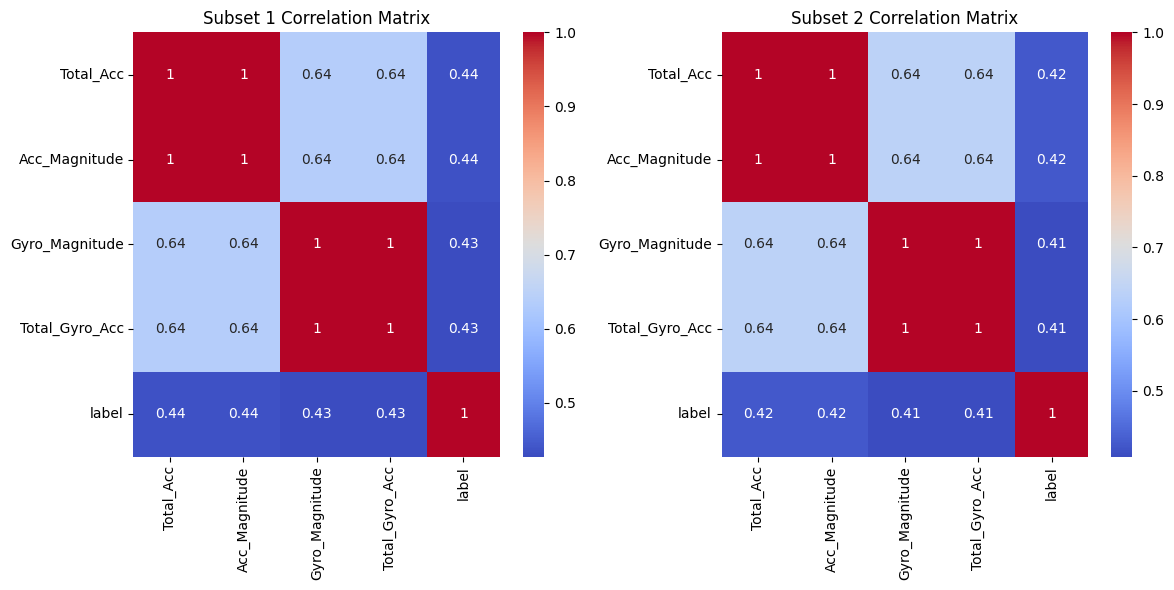

In [ ]:
# DAY 2
# 2d. ii. Verify Correlation Consistency Across Data Subsets
# Step 1: Split the dataset into two subsets (for example, using random sampling)
subset_1 = df.sample(frac=0.5, random_state=42)  # Randomly sample 50% of the data
subset_2 = df.drop(subset_1.index)  # Use the rest of the data as the second subset

# Step 2: Calculate the correlation matrices for both subsets
corr_subset_1 = subset_1[selected_features].corr()
corr_subset_2 = subset_2[selected_features].corr()

# Step 3: Print and compare correlation matrices
print("Correlation matrix for subset 1:")
print(corr_subset_1)

print("\nCorrelation matrix for subset 2:")
print(corr_subset_2)

# Step 4: Visualize the correlation consistency for both subsets using heatmaps
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.heatmap(corr_subset_1, annot=True, cmap='coolwarm')
plt.title('Subset 1 Correlation Matrix')

plt.subplot(1, 2, 2)
sns.heatmap(corr_subset_2, annot=True, cmap='coolwarm')
plt.title('Subset 2 Correlation Matrix')

plt.tight_layout()
plt.show()



DAY 3
Part 3d.iii: Use Domain Knowledge or External Data to Validate Flagged Outliers

In [ ]:
#DAY 3
# 3d.iii: Use domain knowledge to validate flagged outliers with updated thresholds

def validate_outliers_with_domain(df, common_outliers, column):
    # Update thresholds based on revised domain knowledge
    if column == 'Total_Acc':
        threshold = 4  # Updated threshold for aggressive acceleration (m/s²)
    elif column == 'Acc_Magnitude':
        threshold = 2  # Updated threshold for unusual acceleration (m/s²)
    elif column == 'Gyro_Magnitude':
        threshold = -2   # Updated threshold for rapid orientation changes (rad/s)
    else:
        print(f"Domain knowledge not available for {column}")
        return None, None
    
    # Validate outliers: Outliers that exceed the threshold are considered valid
    valid_outliers = common_outliers[common_outliers[column] > threshold]
    invalid_outliers = common_outliers[common_outliers[column] <= threshold]
    
    # Report results
    print(f"--- {column} Outlier Validation ---")
    print(f"Total Common Outliers: {len(common_outliers)}")
    print(f"Valid Outliers (Exceeding Domain Threshold): {len(valid_outliers)}")
    print(f"Invalid Outliers (Below Domain Threshold): {len(invalid_outliers)}")

    return valid_outliers, invalid_outliers

# Example use with updated thresholds
for feature, params in fine_tune_params.items():
    print(f"Validating outliers for {feature} based on domain knowledge:")
    common_outliers = analyze_outliers_validity(df, feature, params['iqr_multiplier'], params['z_threshold'])
    validate_outliers_with_domain(df, common_outliers, feature)


Validating outliers for Total_Acc based on domain knowledge:
Total Common Outliers Detected in Total_Acc: 474
Sample Outliers (first 5):
   Longitude   Latitude  Speed   Distance                Time     Acc X  \
0  73.822520  18.501616  0.732  14.906174 1900-01-01 18:45:29 -2.122472   
1  73.822520  18.501616  0.732  14.906174 1900-01-01 18:45:29 -1.419307   
2  73.822520  18.501616  0.732  14.906174 1900-01-01 18:45:29 -1.996506   
3  73.822520  18.501616  0.732  14.906174 1900-01-01 18:45:29  0.117075   
4  73.822482  18.501607  0.820  18.999422 1900-01-01 18:45:29  0.516364   

      Acc Y     Acc Z  Heading    gyro_x  ...  Acceleration_Spike  \
0 -0.189452 -6.099024    354.0 -0.467577  ...            3.455808   
1  3.579076 -5.142380    352.0 -0.524387  ...           -0.036524   
2  0.824320 -5.376179    353.0  0.383970  ...            3.777367   
3 -1.512350  8.410082    355.0  0.954518  ...            2.751920   
4 -4.791968  6.829897    355.0  0.349150  ...           -0.186530  

DAY 4
4d: Outlier Validation and Threshold Adjustments

i. Analyze Patterns in False Positives/Negatives

You can analyze the detected false positives and false negatives to find common patterns.

In [ ]:
# DAY 4
# Z-score outlier detection function
def z_score_outliers(df, column, threshold=3):
    z_scores = (df[column] - df[column].mean()) / df[column].std()
    return df[np.abs(z_scores) > threshold]

# Function to flag and compare outliers for each column using both IQR and Z-score
def flag_and_compare_outliers(df, column, iqr_multiplier=1.5, z_threshold=3):
    iqr_out = iqr_outliers(df, column, iqr_multiplier)
    z_out = z_score_outliers(df, column, z_threshold)
    
    # Finding common outliers flagged by both methods
    common_outliers = pd.merge(iqr_out, z_out, how='inner', on=df.columns.tolist())
    return common_outliers, iqr_out, z_out

# 3b: Visualize anomalies using time-series and scatter plots
for feature in key_features:
    common_outliers, iqr_out, z_out = flag_and_compare_outliers(df, feature, iqr_multiplier=2.0, z_threshold=2.5)

    print(f"--- Column: {feature} ---")
    print(f"Common outliers: {len(common_outliers)}")
    print(f"Outliers by IQR: {len(iqr_out)}")
    print(f"Outliers by Z-score: {len(z_out)}")
    
# 3c: Evaluate the impact of new features on outlier detection results and propose a feature set

# Evaluate outlier detection for each feature
for feature in key_features:
    common_outliers, iqr_out, z_out = flag_and_compare_outliers(df, feature, iqr_multiplier=2.0, z_threshold=2.5)
    
    print(f"--- {feature} Evaluation ---")
    print(f"Common outliers: {len(common_outliers)}")
    print(f"Outliers by IQR: {len(iqr_out)}")
    print(f"Outliers by Z-score: {len(z_out)}")
    
# Propose a feature set for machine learning based on key features with strong correlation to 'label'
proposed_features = ['Total_Acc', 'Acc_Magnitude', 'Gyro_Magnitude', 'label']
print("Proposed Feature Set for Machine Learning:", proposed_features)

# These features can now be used to train anomaly detection models.
# Fine-tune IQR and Z-score methods for each feature
def z_score_outliers(df, column, threshold=3):
    z_scores = (df[column] - df[column].mean()) / df[column].std()
    return df[np.abs(z_scores) > threshold]

def iqr_outliers(df, column, iqr_multiplier=1.5):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - iqr_multiplier * IQR
    upper_bound = Q3 + iqr_multiplier * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

# Updated fine-tune parameters for each feature
fine_tune_params = {
    'Total_Acc': {'iqr_multiplier': 2.25, 'z_threshold': 2.25},
    'Acc_Magnitude': {'iqr_multiplier': 2.25, 'z_threshold': 2.25},
    'Gyro_Magnitude': {'iqr_multiplier': 2.0, 'z_threshold': 2.25},
    'label': {'iqr_multiplier': 1.5, 'z_threshold': 3.0}  # No changes for label
}

# Evaluate outliers with updated fine-tuned thresholds
def evaluate_outliers_fine_tuned(df, column, iqr_multiplier, z_threshold):
    iqr_out = iqr_outliers(df, column, iqr_multiplier)
    z_out = z_score_outliers(df, column, z_threshold)
    
    common_outliers = pd.merge(iqr_out, z_out, how='inner', on=df.columns.tolist())
    
    # False Positives and False Negatives
    false_positives_iqr = iqr_out[~iqr_out.index.isin(z_out.index)]  # Outliers by IQR but not Z-score
    false_negatives_iqr = df[(~df.index.isin(iqr_out.index)) & (df.index.isin(z_out.index))]  # Z-score outliers missed by IQR
    
    false_positives_z = z_out[~z_out.index.isin(iqr_out.index)]  # Outliers by Z-score but not IQR
    false_negatives_z = df[(~df.index.isin(z_out.index)) & (df.index.isin(iqr_out.index))]  # IQR outliers missed by Z-score

    return {
        'common_outliers': len(common_outliers),
        'false_positives_iqr': len(false_positives_iqr),
        'false_negatives_iqr': len(false_negatives_iqr),
        'false_positives_z': len(false_positives_z),
        'false_negatives_z': len(false_negatives_z)
    }

# Run the fine-tuned evaluation for each feature
for feature, params in fine_tune_params.items():
    results = evaluate_outliers_fine_tuned(df, feature, params['iqr_multiplier'], params['z_threshold'])

    print(f"--- {feature} Fine-Tuned Outlier Evaluation ---")
    print(f"Common Outliers: {results['common_outliers']}")
    print(f"False Positives (IQR): {results['false_positives_iqr']}")
    print(f"False Negatives (IQR): {results['false_negatives_iqr']}")
    print(f"False Positives (Z-score): {results['false_positives_z']}")
    print(f"False Negatives (Z-score): {results['false_negatives_z']}")
    print("\n")



--- Column: Total_Acc ---
Common outliers: 441
Outliers by IQR: 576
Outliers by Z-score: 441
--- Column: Acc_Magnitude ---
Common outliers: 441
Outliers by IQR: 576
Outliers by Z-score: 441
--- Column: Gyro_Magnitude ---
Common outliers: 424
Outliers by IQR: 505
Outliers by Z-score: 424
--- Column: label ---
Common outliers: 0
Outliers by IQR: 0
Outliers by Z-score: 0
--- Total_Acc Evaluation ---
Common outliers: 441
Outliers by IQR: 576
Outliers by Z-score: 441
--- Acc_Magnitude Evaluation ---
Common outliers: 441
Outliers by IQR: 576
Outliers by Z-score: 441
--- Gyro_Magnitude Evaluation ---
Common outliers: 424
Outliers by IQR: 505
Outliers by Z-score: 424
--- label Evaluation ---
Common outliers: 0
Outliers by IQR: 0
Outliers by Z-score: 0
Proposed Feature Set for Machine Learning: ['Total_Acc', 'Acc_Magnitude', 'Gyro_Magnitude', 'label']
--- Total_Acc Fine-Tuned Outlier Evaluation ---
Common Outliers: 474
False Positives (IQR): 0
False Negatives (IQR): 82
False Positives (Z-score)

DAY 5, PART 1 & 2 CHANDANA 
# Research Report: Hyperparameter Tuning and Performance Metrics for Local Outlier Factor (LOF)

## 1. Introduction

Local Outlier Factor (LOF) is an unsupervised anomaly detection method that identifies outliers by measuring the local density deviation of a given data point compared to its neighbors. LOF is particularly useful in identifying anomalies in datasets where the density of points varies.

This report explores the **hyperparameter tuning** techniques for optimizing LOF's performance and the relevant **performance metrics** used to evaluate the effectiveness of LOF in anomaly detection tasks.

## 2. Hyperparameters in LOF

LOF's performance is heavily influenced by two key hyperparameters:

### 2.1 `n_neighbors`
- **Definition**: The number of neighbors considered when calculating the local density of a data point. The LOF score is derived by comparing the density of the point to its neighbors.
- **Effect**:
  - A smaller `n_neighbors` value increases the sensitivity to local variations and identifies very localized outliers. However, it may lead to unstable results when the data has noise.
  - A larger `n_neighbors` value smooths the analysis by considering a wider area, but it can miss local anomalies.
- **Tuning Strategy**:
  - A grid search over values such as `[5, 10, 20, 50, 100]` can be used to identify the optimal number of neighbors.
  - **Cross-validation** or a separate validation set can help in selecting the value that minimizes false positives and false negatives.

### 2.2 `contamination`
- **Definition**: The proportion of outliers in the dataset. LOF uses this value to set the decision threshold for labeling data points as outliers.
- **Effect**:
  - If `contamination` is set too low, LOF may fail to detect true outliers, resulting in false negatives.
  - If set too high, LOF will mark many normal points as outliers, resulting in false positives.
- **Tuning Strategy**:
  - The true proportion of anomalies is often unknown. It's typical to experiment with different contamination levels (e.g., `[0.01, 0.05, 0.1, 0.2]`).
  - In practice, the best value is often determined by the precision-recall tradeoff or by manually inspecting results if the dataset size is manageable.

### 2.3 `metric`
- **Definition**: The distance metric used to compute the distances between points (e.g., Euclidean, Manhattan).
- **Effect**:
  - The chosen metric affects how the distance between points is computed, impacting the calculation of local density.
- **Tuning Strategy**:
  - For most datasets, the default Euclidean distance works well, but other metrics can be explored based on domain knowledge or the specific geometry of the data.

### 2.4 `leaf_size`
- **Definition**: The leaf size affects the efficiency of the LOF algorithm, especially in high-dimensional data.
- **Effect**:
  - A small leaf size improves accuracy but increases computation time.
  - A large leaf size speeds up the calculation but may miss detailed local structure in the data.
- **Tuning Strategy**:
  - Typically, leaf size values in the range `[10, 30, 50]` are tested for balancing efficiency and accuracy.

## 3. Performance Metrics

When evaluating the performance of LOF, a few standard metrics can be used, especially if ground-truth labels (normal vs. outlier) are available.

### 3.1 Precision
- **Definition**: The proportion of detected anomalies that are actually outliers.
  - Precision = (True Positives) / (True Positives + False Positives)
- **Interpretation**:
  - A high precision score indicates that LOF correctly identifies anomalies with fewer false positives.

### 3.2 Recall (Sensitivity)
- **Definition**: The proportion of true outliers that were detected by LOF.
  - Recall = (True Positives) / (True Positives + False Negatives)
- **Interpretation**:
  - A high recall score means that LOF successfully detects most of the actual anomalies.

### 3.3 F1-Score
- **Definition**: The harmonic mean of precision and recall. It provides a single score that balances both precision and recall.
  - F1-Score = 2 * (Precision * Recall) / (Precision + Recall)
- **Interpretation**:
  - A higher F1-score suggests that LOF is achieving a good balance between precision and recall.

### 3.4 Area Under the Precision-Recall Curve (AUC-PR)
- **Definition**: Measures the tradeoff between precision and recall across different thresholds. 
  - AUC-PR = Area under the curve that plots precision vs. recall for different thresholds.
- **Interpretation**:
  - A high AUC-PR score indicates that the model performs well across varying decision thresholds, making it less sensitive to threshold choice.

### 3.5 ROC-AUC (Receiver Operating Characteristic - Area Under Curve)
- **Definition**: Plots the true positive rate (recall) against the false positive rate (1 - specificity) at various threshold settings.
  - ROC-AUC = Area under the ROC curve.
- **Interpretation**:
  - A ROC-AUC score closer to 1 means LOF can distinguish between normal and anomalous points effectively.

### 3.6 False Positive Rate (FPR)
- **Definition**: The proportion of normal points incorrectly classified as outliers.
  - FPR = (False Positives) / (False Positives + True Negatives)
- **Interpretation**:
  - A low false positive rate is critical in cases where false alarms are costly.

## 4. Hyperparameter Tuning Approach

The optimal LOF hyperparameters can be selected using the following steps:

### 4.1 Grid Search with Cross-Validation
- **Procedure**:
  1. Define a grid of possible hyperparameter values (e.g., different values for `n_neighbors`, `contamination`, and `leaf_size`).
  2. Perform k-fold cross-validation on the training dataset using a scoring metric like F1-Score or ROC-AUC.
  3. Select the cin)

# Best hyperparameters
best_params = grid_search.best_params_
print(f"Best hyperparameters: {best_params}")


## 5. Conclusion

- **Hyperparameter tuning** for LOF involves adjusting critical parameters like `n_neighbors`, `contamination`, and `metric` to achieve better performance in detecting outliers.
- **Performance metrics** such as Precision, Recall, F1-Score, and ROC-AUC provide insights into how well LOF is identifying anomalies. Proper tuning can improve the model's ability to balance sensitivity (recall) with precision.
- **Grid search** and **random search** are common methods to explore the hyperparameter space for optimal performance.
- Future improvements might include experimenting with different distance metrics or employing feature scaling techniques to enhance LOF's performance in high-dimensional datasets.


# DAY 6
5d: Data Augmentation for Anomalies

To further test the robustness of anomaly detection, we'll generate synthetic anomalies and inject them into the dataset. These synthetic anomalies simulate sudden spikes or changes in sensor data.

In [ ]:
# DAY 6 -- OUTPUT EXPLANATION
# 5d: Data Augmentation for Anomalies

def augment_data_with_synthetic_anomalies(df, num_anomalies=50):
    np.random.seed(42)  # For reproducibility
    
    # Create a list to store synthetic anomaly rows
    synthetic_anomalies = []

    # Create synthetic anomalies (e.g., large spikes in Acc X, Y, Z)
    for _ in range(num_anomalies):
        anomaly = {
            'Acc X': np.random.uniform(-30, 30),  # Simulated large values for accelerometer
            'Acc Y': np.random.uniform(-30, 30),
            'Acc Z': np.random.uniform(-30, 30),
            'gyro_x': np.random.uniform(-20, 20),  # Simulated large values for gyroscope
            'gyro_y': np.random.uniform(-20, 20),
            'gyro_z': np.random.uniform(-20, 20),
            'Speed': np.random.uniform(0, 150),   # Simulated high-speed spikes
            'Distance': np.random.uniform(100, 500)  # Simulated long-distance spikes
        }
        synthetic_anomalies.append(anomaly)
    
    # Convert the list of synthetic anomalies to a DataFrame
    synthetic_anomalies_df = pd.DataFrame(synthetic_anomalies)

    # Concatenate the original DataFrame with the synthetic anomalies
    df_augmented = pd.concat([df, synthetic_anomalies_df], ignore_index=True)

    print(f"Added {num_anomalies} synthetic anomalies to the dataset.")
    return df_augmented

# Add synthetic anomalies to the dataset
df_augmented = augment_data_with_synthetic_anomalies(df, num_anomalies=50)

# Display the new dataset with synthetic anomalies
print(f"Dataset with Synthetic Anomalies:\n{df_augmented.tail(10)}")


Added 50 synthetic anomalies to the dataset.
Dataset with Synthetic Anomalies:
       Longitude  Latitude       Speed    Distance      Acc X      Acc Y  \
14286        NaN       NaN   83.153108  344.688298   2.953600  12.875755   
14287        NaN       NaN    6.900396  116.291521  -4.823996 -15.136141   
14288        NaN       NaN   25.980280  273.540660  21.327635  12.219472   
14289        NaN       NaN   75.470439  442.595936  -6.089716   6.951006   
14290        NaN       NaN  141.034536  330.189671   9.521618 -20.223934   
14291        NaN       NaN  144.178585  462.140257  -6.709804   8.597293   
14292        NaN       NaN   10.678297  227.590252 -18.252532 -25.838322   
14293        NaN       NaN   94.341427  450.988805  20.692519 -28.603684   
14294        NaN       NaN  148.575771  265.047071  14.104263  18.208856   
14295        NaN       NaN  112.630660  401.817150  -7.678915  16.584778   

           Acc Z  Heading     gyro_x     gyro_y  ...  hour  minute  second  \
14286 

DAY 7 
6d. Data Augmentation for Anomalies

i.Generate synthetic anomalies: Create simulated anomalies in the data by modifying existing patterns or adding noise.

ii. Incorporate synthetic data into training: Integrate the augmented anomalies with the original dataset and rerun Isolation Forest.

CHANDANA M -- iii. Visualize augmented anomalies: Use visualization tools to ensure the augmented data is properly recognized as outliers.

iv. Compare model performance: Assess whether the model can effectively detect both real and synthetic anomalies, documenting improvements or declines in performance.


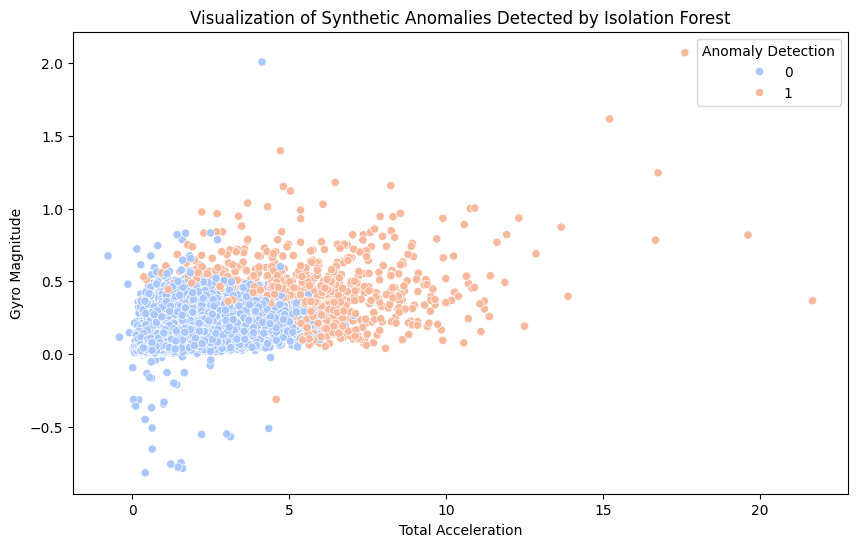

In [ ]:
# DAY 7
import matplotlib.pyplot as plt
import seaborn as sns

# Plot Total_Acc vs Gyro_Magnitude to visualize anomalies
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_synthetic, x='Total_Acc', y='Gyro_Magnitude', hue='IsoForest_Synthetic_Anomaly', palette='coolwarm')
plt.title('Visualization of Synthetic Anomalies Detected by Isolation Forest')
plt.xlabel('Total Acceleration')
plt.ylabel('Gyro Magnitude')
plt.legend(title="Anomaly Detection")
plt.show()


DAY 8 
7d.iii: Visualize Enhanced Synthetic Anomalies

This code visualizes the augmented anomalies to ensure they are detected as outliers by the Isolation Forest model.

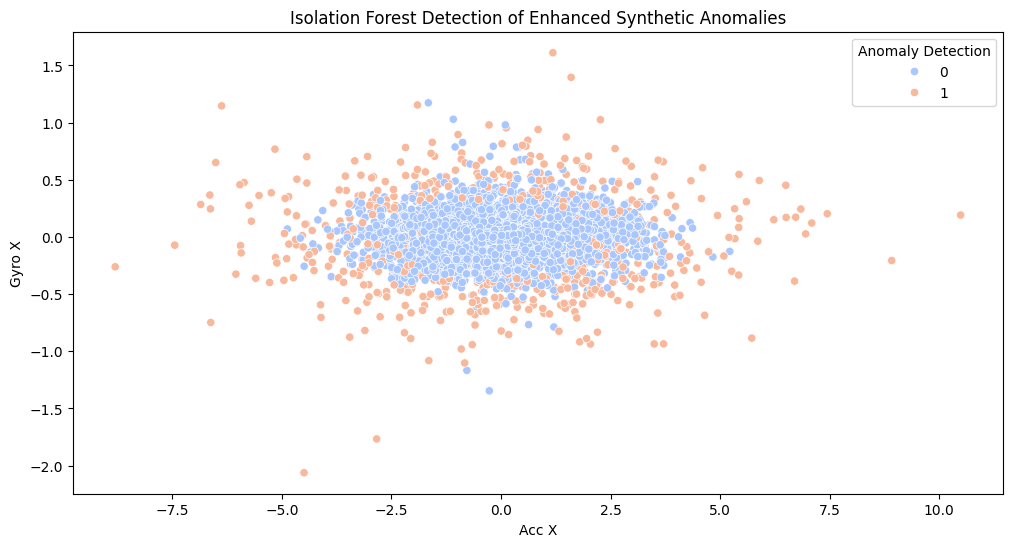

In [ ]:
# DAY 8
import matplotlib.pyplot as plt
import seaborn as sns

# Plot Acc X vs Gyro X to visualize enhanced anomalies
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_enhanced, x='Acc X', y='gyro_x', hue='IsoForest_Enhanced_Anomaly', palette='coolwarm')
plt.title("Isolation Forest Detection of Enhanced Synthetic Anomalies")
plt.xlabel("Acc X")
plt.ylabel("Gyro X")
plt.legend(title="Anomaly Detection")
plt.show()
